# Q1: Analyzing Neural Spike Patterns

### The data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Manually creating the datasets
# Regular firing neuron (no noise)
neuron_a_spikes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200,
                   210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400,
                   410, 420, 430, 440, 450, 460, 470, 480, 490, 500]

# Irregular firing neuron (with noise)
neuron_b_spikes = [10.2, 19.5, 30.1, 39.8, 50.3, 60.7, 70.4, 79.9, 90.2, 100.5, 110.1, 119.6, 130.3, 140.8, 150.0, 160.4, 170.9, 180.2, 190.5, 200.1,
                    210.3, 220.7, 229.4, 240.9, 250.2, 260.5, 269.4, 280.6, 290.3, 300.8, 310.0, 319.4, 330.9, 340.2, 350.5, 359.3, 370.6, 380.3, 390.8, 400.0,
                    410.4, 420.9, 429.2, 439.5, 450.1, 460.3, 470.7, 480.4, 489.9, 499.5]

# Bursting neuron
neuron_c_spikes = [1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 31, 32, 33, 34, 35, 41, 42, 43, 44, 45,
                    51, 52, 53, 54, 55, 61, 62, 63, 64, 65, 71, 72, 73, 74, 75, 81, 82, 83, 84, 85, 91, 92, 93, 94, 95,
                    101, 102, 103, 104, 105, 111, 112, 113, 114, 115, 121, 122, 123, 124, 125, 131, 132, 133, 134, 135,
                    141, 142, 143, 144, 145, 151, 152, 153, 154, 155, 161, 162, 163, 164, 165, 171, 172, 173, 174, 175,
                    181, 182, 183, 184, 185, 191, 192, 193, 194, 195, 201, 202, 203, 204, 205, 211, 212, 213, 214, 215,
                    221, 222, 223, 224, 225, 231, 232, 233, 234, 235, 241, 242, 243, 244, 245, 251, 252, 253, 254, 255,
                    261, 262, 263, 264, 265, 271, 272, 273, 274, 275, 281, 282, 283, 284, 285, 291, 292, 293, 294, 295,
                    301, 302, 303, 304, 305, 311, 312, 313, 314, 315, 321, 322, 323, 324, 325, 331, 332, 333, 334, 335,
                    341, 342, 343, 344, 345, 351, 352, 353, 354, 355, 361, 362, 363, 364, 365, 371, 372, 373, 374, 375,
                    381, 382, 383, 384, 385, 391, 392, 393, 394, 395, 401, 402, 403, 404, 405, 411, 412, 413, 414, 415,
                    421, 422, 423, 424, 425, 431, 432, 433, 434, 435, 441, 442, 443, 444, 445, 451, 452, 453, 454, 455,
                    461, 462, 463, 464, 465, 471, 472, 473, 474, 475, 481, 482, 483, 484, 485, 491, 492, 493, 494, 495]

### Part A: Visualize Spike Trains (Raster Plots)

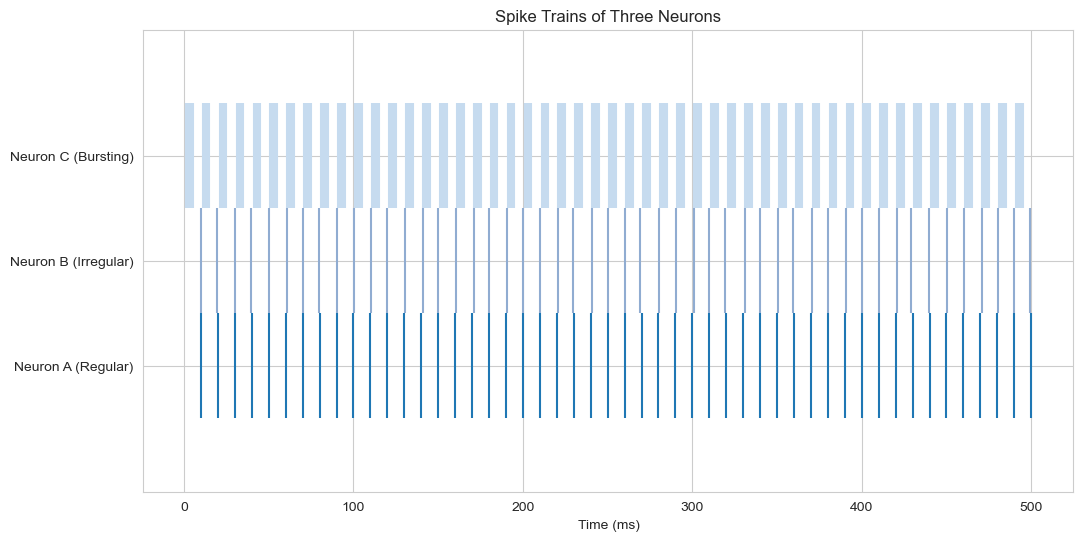

In [64]:
# Plotting the spike trains
plt.figure(figsize=(12, 6))
# sns styling and theme
sns.set_style("whitegrid")
plt.eventplot([neuron_a_spikes, neuron_b_spikes, neuron_c_spikes], colors=["#1f77b4", "#90acd1", "#c6dbef"])
plt.yticks([0, 1, 2], ['Neuron A (Regular)', 'Neuron B (Irregular)', 'Neuron C (Bursting)'])
plt.xlabel('Time (ms)')
plt.title('Spike Trains of Three Neurons')
plt.show()

The regular firing neuron (A) has uniform spike timing over the time period. The noisy regular firing neuron (B), is mostly uniform timing except for slight variance only due to varying time intervals. The bursting neuron (C) is denoted with clusters of rapid spikes separated by longer non-firing periods. The above mentioned characteristics can be clearly identified in the above visualization

### Part B: Analyze Inter-Spike Intervals (ISI)

Text(0, 0.5, 'Count')

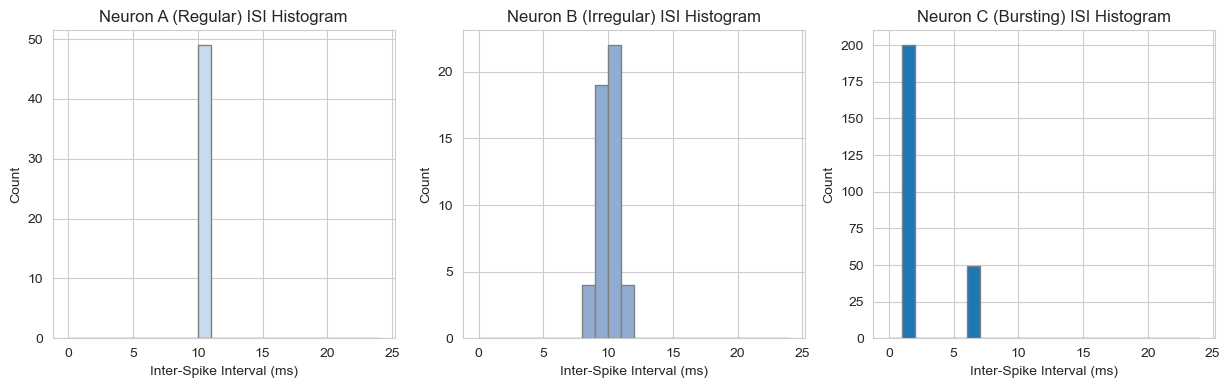

In [65]:
# Calculating the inter-spike intervals (ISIs)
isi_a = np.diff(neuron_a_spikes)
isi_b = np.diff(neuron_b_spikes)
isi_c = np.diff(neuron_c_spikes)

# creating bins for histogram
bins = np.arange(0, 25, 1)
# Plotting the ISI histograms
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(isi_a, bins=bins, color="#c6dbef", edgecolor='gray')
plt.title('Neuron A (Regular) ISI Histogram')
plt.xlabel('Inter-Spike Interval (ms)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(isi_b, bins=bins, color="#90acd1", edgecolor='gray')
plt.title('Neuron B (Irregular) ISI Histogram')
plt.xlabel('Inter-Spike Interval (ms)')
plt.ylabel('Count') 

plt.subplot(1, 3, 3)
plt.hist(isi_c, bins=bins, color="#1f77b4", edgecolor='gray')
plt.title('Neuron C (Bursting) ISI Histogram')
plt.xlabel('Inter-Spike Interval (ms)')
plt.ylabel('Count')

- Neuron A (Regular): The ISI is the same (10ms) for each neuronal firing, resulting in a point mass distribution.
- Neuron C (Burst): The ISI has 2 spikes, one peak resembles (at 1ms) the spike intervals within the burst, the other (6ms) peak resembles the intervals between the bursts themselves.
- Neuron B (Irregular): The ISI has a distribution that resembles somewhat of a normal distribution.

The distributions of the histograms are largely dependent on (and resembles) the noise within the neuronal firings

### Part C: Generate and Classify Your Own Neuron

In [ ]:
np.random.seed(77) #for reproducibility of the random noise
#spike time data from three neurons recorded over a 5-second period

# Regular firing neuron (no noise)
# neuron_a_spikes = np.arange(0, 5000, step=10) # spikes every 10 ms

# Irregular firing neuron (with Gaussian noise)
# spikes every 10 ms with some jitter
neuron_b_spikes = np.sort(np.arange(0, 5000, step=10) + np.random.normal(0, 2, size=500))

# Bursting neuron
# neuron_c_spikes = []
# for burst_start in range(0, 5000, 200):
#     burst_spikes = burst_start + np.arange(0, 50, step=5) # 10 spikes in quick succession every 100 ms
#     neuron_c_spikes.extend(burst_spikes)